<a href="https://colab.research.google.com/github/Daniel-Pereira3264/Machine-Learning-using-Python-Edge-Training/blob/main/Final_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Daniel Deep Pereira
ID: 230205053

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Read The Dataset (CSV file)

In [ ]:
df = pd.read_csv('/content/stroke.csv')
print('Student Scores DataFrame from csv: \n', df)

Student Scores DataFrame from csv: 
       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence

1. Data Processing

i. Handling Missing Valus.

In [ ]:
df_cleaned = df.dropna()

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,1544


ii. Encoding Categorical Variables

In [ ]:
label_encoders = {}
categorical_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

display(df)

<ipython-input-86-0d1c8cec3cc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-86-0d1c8cec3cc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-86-0d1c8cec3cc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


iii. Scaling

In [ ]:
scaler = MinMaxScaler()
numerical_columns = ["age", "avg_glucose_level", "bmi"]
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

display(df_cleaned)


<ipython-input-87-9f4a69cb56cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.791667,0,1,1,2,1,0.801265,0.311801,0,1
2,1,0.972222,0,1,1,2,0,0.234512,0.260870,1,1
3,0,0.541667,0,0,1,2,1,0.536008,0.284472,2,1
4,0,0.958333,1,0,1,3,0,0.549349,0.155280,1,1
5,1,0.986111,0,0,1,2,1,0.605161,0.217391,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,1.000000,1,0,1,3,0,0.077786,0.208696,1,0
5102,0,0.652778,0,0,1,2,0,0.105300,0.126708,1,0
5106,0,0.986111,0,0,1,3,1,0.323516,0.354037,1,0
5107,0,0.347222,0,0,1,3,0,0.128658,0.237267,1,0


2. Feature Selection

In [ ]:
X = df_cleaned.drop(columns=["stroke"])
y = df_cleaned["stroke"].astype(int)  # Ensure target is integer

model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]


In [ ]:
feature_importance = model.fit(X_rfe, y).coef_[0]
feature_importance_dict = dict(zip(selected_features, feature_importance))

print("Selected Features and Their Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")


Selected Features and Their Importance:
age: 4.127018564274471
hypertension: 0.6009476621373802
heart_disease: 0.5181009218270782
avg_glucose_level: 0.9690183548749836
bmi: 0.10195209467799088


3. Model Building

i. K-NN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Finding the optimal k value
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k value: {optimal_k}")

# Train final K-NN model with optimal k
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final K-NN accuracy with k={optimal_k}: {final_accuracy}")

Optimal k value: 12
Final K-NN accuracy with k=12: 0.9358600583090378


SVM Model

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f"K-SVM accuracy with linear kernel: {svm_accuracy}")

K-SVM accuracy with linear kernel: 0.9358600583090378


4. Model Ecvaluation:
   Classification Metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Step 7: Train models
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train, y_train)
y_knn_pred = knn_final.predict(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_log_pred = log_reg_model.predict(X_test)

Compute Evaluation Metrics

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name}: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1 Score={f1}")
    return [accuracy, precision, recall, f1]

knn_metrics = evaluate_model(y_test, y_knn_pred, "K-NN")
svm_metrics = evaluate_model(y_test, y_svm_pred, "K-SVM")
log_metrics = evaluate_model(y_test, y_log_pred, "Logistic Regression")

K-NN: Accuracy=0.9314868804664723, Precision=0.0, Recall=0.0, F1 Score=0.0
K-SVM: Accuracy=0.9358600583090378, Precision=0.0, Recall=0.0, F1 Score=0.0
Logistic Regression: Accuracy=0.9358600583090378, Precision=0.0, Recall=0.0, F1 Score=0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5. Visualization

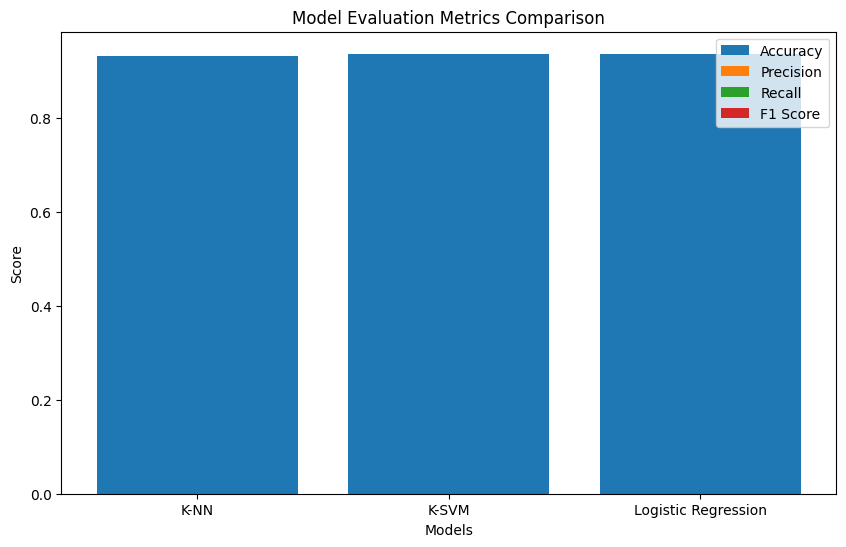

In [ ]:
models = ["K-NN", "K-SVM", "Logistic Regression"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = np.array([knn_metrics, svm_metrics, log_metrics])

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.bar(models, values[:, i], label=metrics[i])

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics Comparison")
plt.legend()
plt.show()

Confusion Matrices

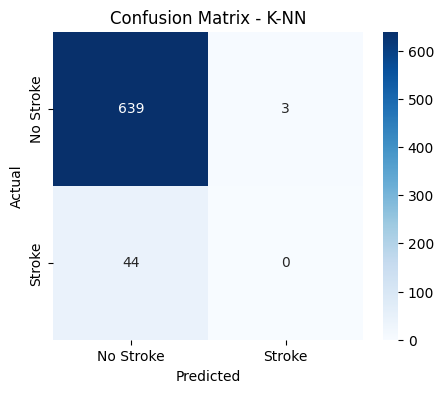

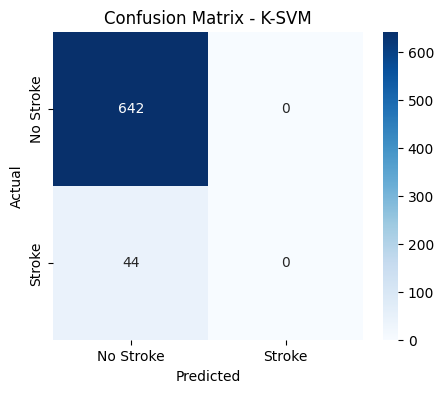

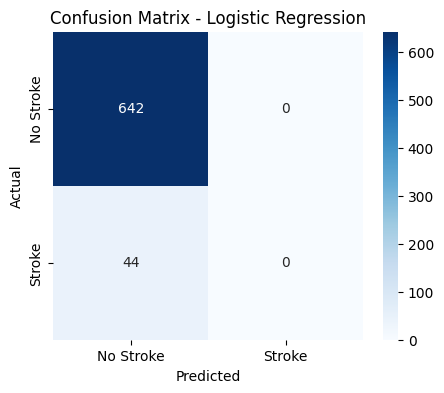

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_knn_pred, "K-NN")
plot_confusion_matrix(y_test, y_svm_pred, "K-SVM")
plot_confusion_matrix(y_test, y_log_pred, "Logistic Regression")